Training set size: {train_images.size}
Test set size: {test_images.size}
Epoch 1/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.2544 - acc: 0.9267
Epoch 2/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.1034 - acc: 0.9690
Epoch 3/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.0677 - acc: 0.9799
Epoch 4/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.0495 - acc: 0.9853
Epoch 5/5
10000/10000 [==============================] - 1s 60us/step
Test loss: 0.0677824585719849
Test accuracy: 0.9789


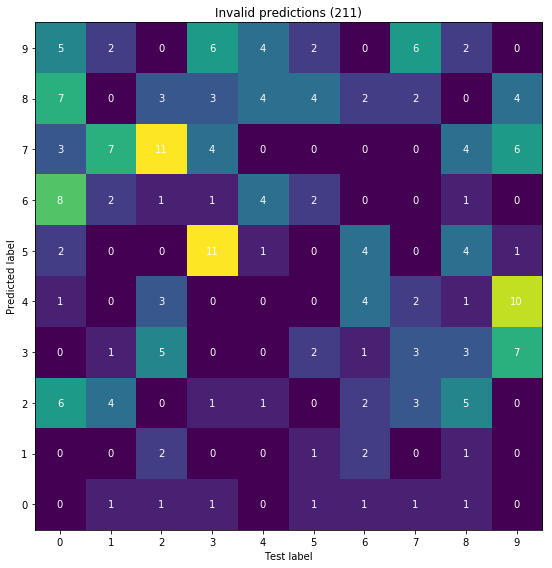

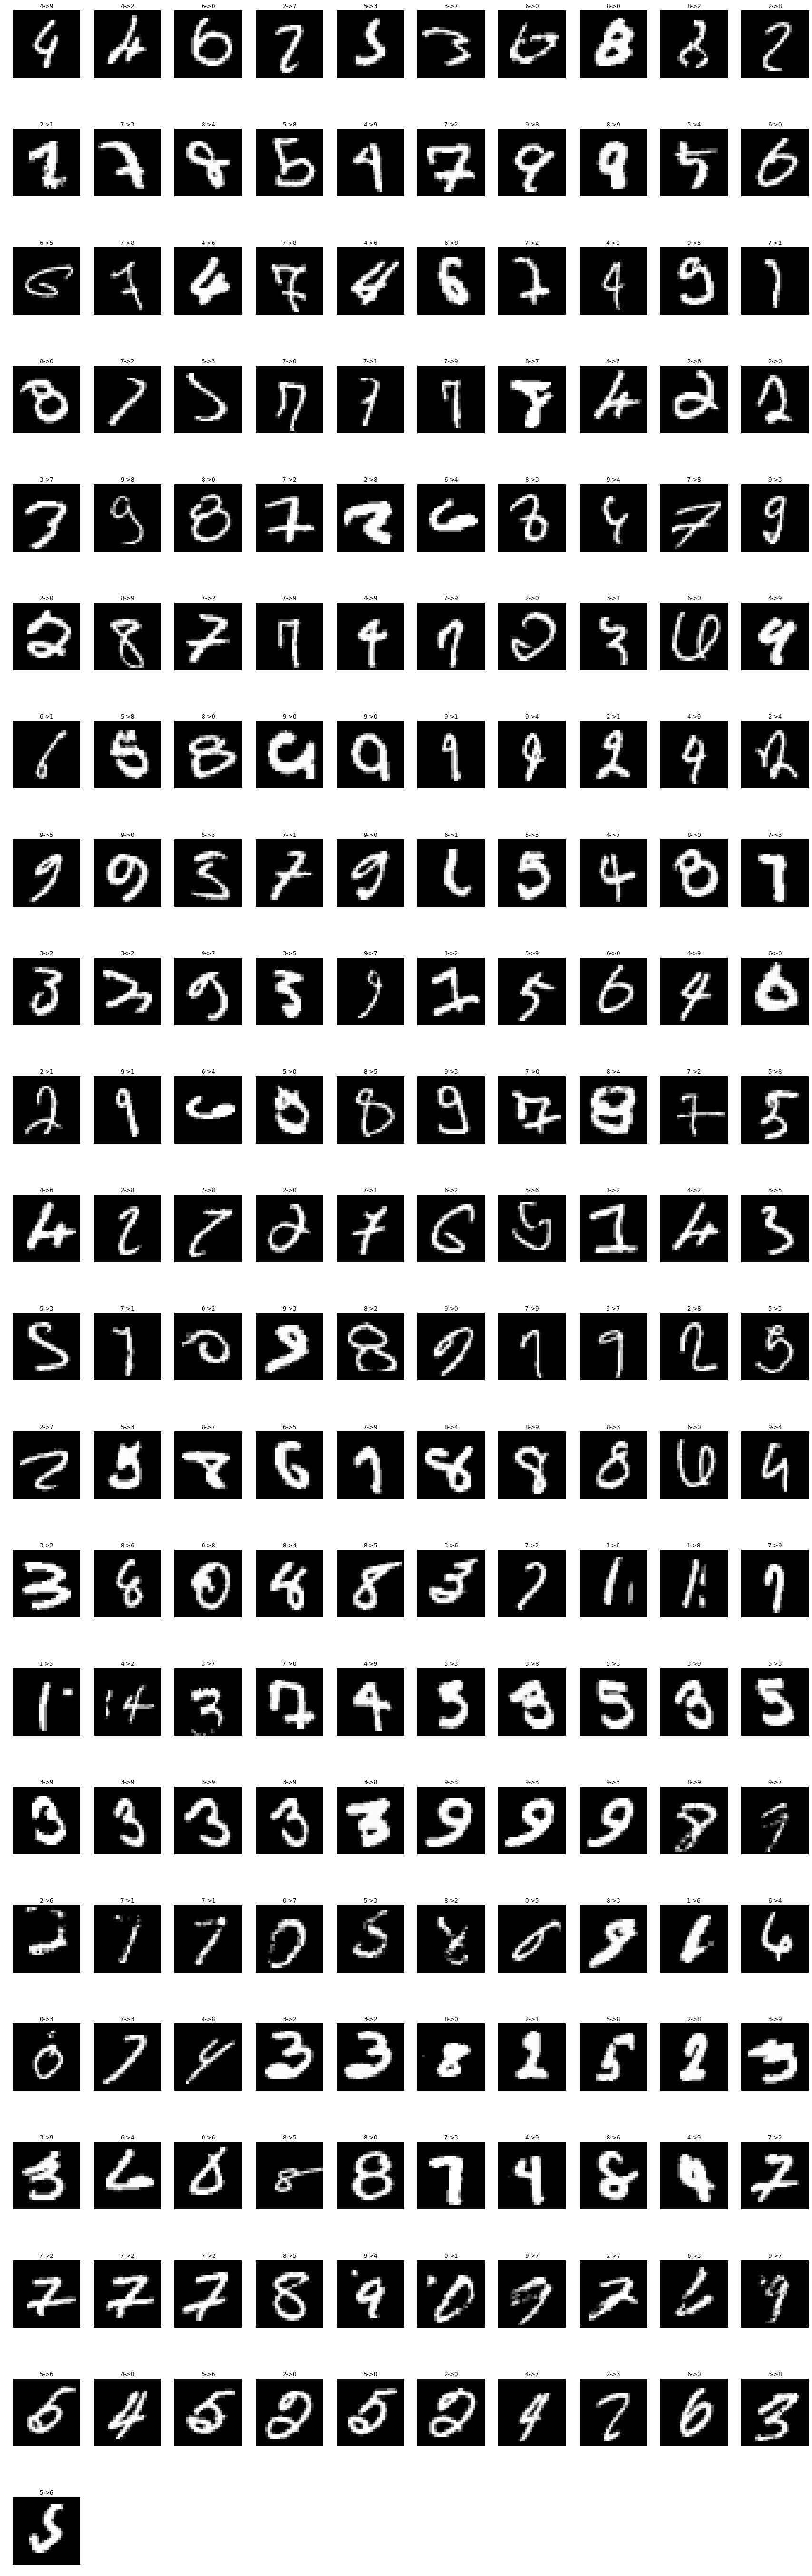

In [17]:
import math
import numpy as np
from keras import models
from keras import layers
from keras import datasets
from keras.utils import to_categorical
from matplotlib import pyplot

# MNIST
# Handswritten 28x28 pixel grayscale [0,255] digits.
# Training set size is 60000.
# Test set size is 10000.
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

def print_image_info(name, images, labels, image_index):
    # pyplot.title(f"{name} {images.shape[1]}x{images.shape[1]} image {image_index+1} of {images.shape[0]} with label {labels[image_index]}")
    pyplot.imshow(images[image_index], cmap="gray")
    pyplot.show()

print('Training set size: {train_images.size}')
print('Test set size: {test_images.size}')

#print_image_info("training set", train_images, train_labels, 0)
#print_image_info("test set", test_images, test_labels, 0)

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model_train_images = train_images.reshape((60000, 28*28))
model_train_images = model_train_images.astype('float32') / 255
model_test_images = test_images.reshape((10000, 28*28))
model_test_images = model_test_images.astype('float32') / 255

# print("original train shape:", train_images.shape)
# print("reshaped train shape:", model_train_images.shape)
# print("original test shape:", train_images.shape)
# print("reshaped test shape:", model_train_images.shape)

model_train_labels = to_categorical(train_labels)
model_test_labels = to_categorical(test_labels)

network.fit(model_train_images, model_train_labels, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(model_test_images, model_test_labels)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

predicted_test_labels = network.predict(model_test_images)

# print("original test labels:", model_test_labels.shape)
# print("predicted test labels:", predicted_test_labels.shape)

## Count invalid predictions.

invalid_prediction_cnt = np.zeros((10,10), dtype=int)
invalid_prediction = []

for i,v in enumerate(predicted_test_labels):
    model_test_label = numpy.where(model_test_labels[i] == numpy.amax(model_test_labels[i]))[0].item(0) # tuple + numpy array => scalar
    predicted_test_label = numpy.where(predicted_test_labels[i] == numpy.amax(predicted_test_labels[i]))[0].item(0) # tuple + numpy array => scalar
    if model_test_label != predicted_test_label:
        invalid_prediction_cnt[model_test_label][predicted_test_label] += 1        
        invalid_prediction.append((i, model_test_label, predicted_test_label))
        
total_invalid_prediction_cnt = np.sum(invalid_prediction_cnt)        

## Plot invalid prediction counts.

x_test_labels = np.arange(10)
y_predicted_labels = np.arange(10)

fig, ax = pyplot.subplots(figsize=(8,8))
im = ax.imshow(invalid_prediction_cnt)

ax.set_title(f'Invalid predictions ({total_invalid_prediction_cnt})')
ax.set_xticks(x_test_labels)
ax.set_yticks(y_predicted_labels)
ax.invert_yaxis()
ax.set_xlabel('Test label')
ax.set_ylabel('Predicted label')

for i in range(len(x_test_labels)):
    for j in range(len(y_predicted_labels)):
        # Add number of invalid predictions.
        text = ax.text(j, i, invalid_prediction_cnt[i, j],
                       ha="center", va="center", color="w")

fig.tight_layout()
pyplot.show()
        
## Plot test images with invalid predictions.

pyplot.rcParams["figure.figsize"] = (30,100)

nrows = math.ceil(total_invalid_prediction_cnt / ncols)
ncols = 10

for i in range(total_invalid_prediction_cnt):
    idx, model_test_label, predicted_test_label = invalid_prediction[i]
    row = math.floor(i / ncols)
    col = i % ncols
    ax = pyplot.subplot2grid((nrows,ncols),(row,col))
    ax.axis('off')
    ax.set_title(f'{model_test_label}->{predicted_test_label}')
    ax.imshow(test_images[idx], cmap="gray")
pyplot.show()
